## Project 2 - Exponential Moving Average with C

In [14]:
%matplotlib inline

import IPython
import matplotlib.pyplot as plt
import numpy as np
import math

In [42]:
time = 2.0 # plot 1 second of sample points
sample_rate =  10000# 10K samples/second
low_freq    = 200 # frequency in Hz (was 100)
high_freq   = 4500 #frequency in Hz

## Here is a simple cosine wave

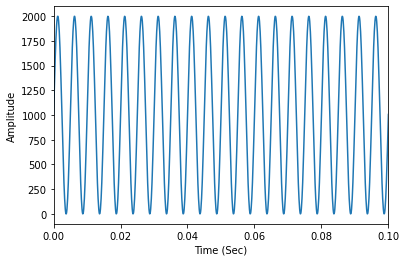

In [43]:
x = np.linspace(0,time, int(time*sample_rate))
y1 = np.sin(2*np.pi*low_freq*x)
y1 = [int(x) for x in y1 *1000 + 1000]
plt.figure()
plt.plot(x,y1)
plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.xlim( (0,0.1))
plt.show()

IPython.display.Audio(y1, rate=sample_rate)

## And another, higher-frequency, wave

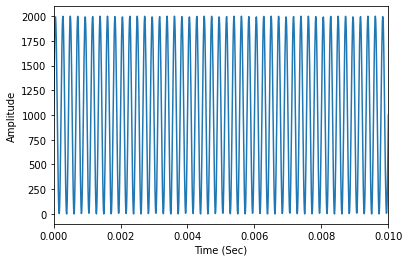

In [44]:
#this is the actual sign: 
y2 = np.sin(2*np.pi*high_freq*x)
y2 = [int(x) for x in y2 *1000 + 1000]

#fixup: but rebuild with an increased sampling rate to make plot look better
x_hs = np.linspace(0,time, int(time*10*sample_rate))
y2_hs = np.sin(2*np.pi*high_freq*x_hs)
y2_hs = [int(x) for x in y2_hs *1000 + 1000]

plt.figure()
plt.plot(x_hs,y2_hs)
plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.xlim((0,0.01))
plt.show()

#but play the actual sound
IPython.display.Audio(y2, rate=sample_rate)

## Here they are combined together

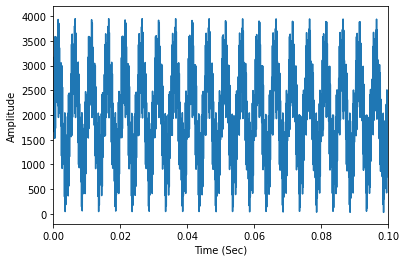

In [45]:
y_sum = [sum(x) for x in zip(y1, y2)]

plt.figure()
plt.plot(x,y_sum)
plt.xlabel('Time (Sec)')
plt.ylabel('Amplitude')
plt.xlim((0,0.1))
plt.show()

IPython.display.Audio(y_sum, rate=sample_rate)

## Here is the "true" Expoential Moving Average filter

In [55]:
y=1000
def ema(x):
    global y
    alpha = 0.05
    y = x * alpha + y * (1.0 - alpha)
    return y

# Let's run this on a simple input first

In [59]:
y = 1000 #reset ema

x_test = [ 0, 100, 0]
print ("X: ", x_test)

#run ema on each value in x_test
y_ema = [ema(x) for x in x_test]
print ("Y: ", y_ema)

pt0 = 0 * 0.05 + 1000 * (1-0.05)
print ('Point 0: ', pt0)

pt1 = 100 * 0.5 + 950 * (1-0.05)
print ('Point 1: ', pt1)



X:  [0, 100, 0]
Y:  [950.0, 907.5, 862.125]
Point 0:  950.0
Point 1:  952.5


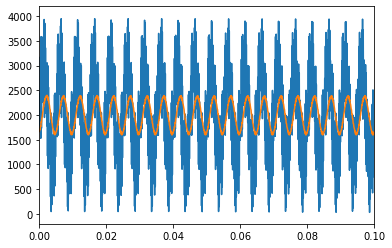

In [49]:
y_ema = [ema(y) for y in y_sum]

plt.figure()
plt.plot(x,y_sum)
plt.plot(x,y_ema)
plt.xlim((0,0.1))
plt.show()

IPython.display.Audio(y_ema, rate=sample_rate)

## Here is the "simplified" EMA filter

It does not work as well (but it's alot easier to make in hardware)

In [50]:
#
# EMA with alpha=0.25 allows for simpler math
#
class Simple_EMA:
    def ema_all(self,buf):
        self.y=int(1000)
        return [self.ema_1(x) for x in buf]
    
    def ema_1(self,x):
        # y = x * 0.25 +  y * 0.75
        # y = x * 0.25 + (y * 0.25 + y * 0.50)
        # y = x / 4    + (y / 4    + y / 2   )
        x = int(x) # x needs to be an integer
        self.y = int(x/4) + int(self.y/4) + int(self.y/2)
        return self.y 
    


## As you can see (and hear) below, the Simple EMA is less effective at filtering out the high-frequency sounds

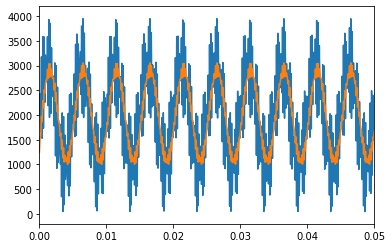

In [51]:
simple_ema = Simple_EMA()
sema = simple_ema.ema_all(y_sum)

plt.figure()
plt.plot(x,y_sum)
plt.plot(x,sema)
plt.xlim((0,0.05))
plt.show()

IPython.display.Audio(y_ema, rate=sample_rate)

## But we can get something almost as good as "true" EMA by repeating "simple" EMA three times

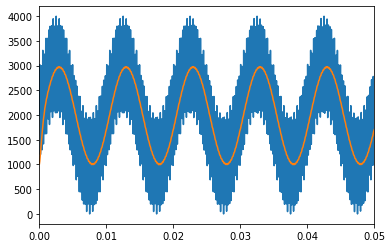

In [41]:
simple_ema = Simple_EMA()

sema = simple_ema.ema_all(y_sum)
sema2 = simple_ema.ema_all(sema)
sema3 = simple_ema.ema_all(sema2)


plt.figure()
plt.plot(x,y_sum)
plt.plot(x,sema3)
plt.xlim((0,0.05))
plt.show()

IPython.display.Audio(sema3, rate=sample_rate)


## Here's the first few points of the data as numbers

This is used as a refernce to compare different implications.  It should match the values in the test.c and test.py implimentations


In [11]:
print ("Input: ", y_sum[:10])
print ("Simple Output:", sema[:10])
print ("Triple Output:", sema3[:10])

Input:  [2000, 2370, 1537, 2995, 1297, 3308, 1416, 3234, 1892, 2845]
Simple Output: [1250, 1529, 1530, 1895, 1744, 2135, 1954, 2273, 2177, 2343]
Triple Output: [1015, 1054, 1106, 1184, 1263, 1360, 1452, 1555, 1650, 1747]


## Now complete the cEMA implimentation

Do that before proceeding, otherwise subsequent steps will fail.

In [12]:
# a little fancyness to deal with Jupyer running as root.
import sys
import os
sys.path.insert(0,os.path.abspath('./cEMA/'))

In [13]:
from cEMA import cEMA
import importlib
importlib.reload(cEMA)
print ("cEMA found at: ", cEMA.__file__)

ImportError: cannot import name 'cEMA' from 'cEMA' (/Users/lukefahr/Library/CloudStorage/OneDrive-IndianaUniversity/class/e315.f22/P2_EMA_SOL/_test/ctests/cEMA.cpython-39-darwin.so)

In [ ]:
cEMA.reset()
cema = cEMA.ema_all(y_sum)
cema2 = cEMA.ema_all(cema)
cema3 = cEMA.ema_all(cema2)

print("Input (first 10)")
print (y_sum[:10])
print ("Simple EMA output (first 10)")
print (sema[:10])
print ("C Version EMA output (first 10)")
print (cema[:10])

#double check they match
assert(cema == sema)
assert(cema3 == sema3)

## Now we can check on runtimes

In [ ]:
import time
simple_ema = Simple_EMA()

In [ ]:
stime = time.time()
a = simple_ema.ema_all(y_sum)
b = simple_ema.ema_all(a)
c = simple_ema.ema_all(b)
etime = time.time()
print("%f seconds" % (etime - stime))
py_time = etime - stime

In [ ]:
stime = time.time()
d = cEMA.ema_all(y_sum)
e = cEMA.ema_all(d)
f = cEMA.ema_all(e)
etime = time.time()
print("%f seconds" % (etime - stime))
c_time = etime - stime

In [ ]:
print ("C is ", (py_time - c_time)/c_time, "X faster than Python")

# For reference, the instructor's C implimentation is typically 20-40X faster than Python